In [1]:
#utilities
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#model building
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [4]:
matches.shape,deliveries.shape

((756, 18), (10330, 21))

In [5]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [7]:
len(matches)

756

In [8]:
len(deliveries)

10330

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10330 entries, 0 to 10329
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          10330 non-null  int64  
 1   inning            10330 non-null  int64  
 2   batting_team      10330 non-null  object 
 3   bowling_team      10330 non-null  object 
 4   over              10329 non-null  float64
 5   ball              10329 non-null  float64
 6   batsman           10329 non-null  object 
 7   non_striker       10329 non-null  object 
 8   bowler            10329 non-null  object 
 9   is_super_over     10329 non-null  float64
 10  wide_runs         10329 non-null  float64
 11  bye_runs          10329 non-null  float64
 12  legbye_runs       10329 non-null  float64
 13  noball_runs       10329 non-null  float64
 14  penalty_runs      10329 non-null  float64
 15  batsman_runs      10329 non-null  float64
 16  extra_runs        10329 non-null  float6

In [11]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
deliveries.isnull().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   1
ball                   1
batsman                1
non_striker            1
bowler                 1
is_super_over          1
wide_runs              1
bye_runs               1
legbye_runs            1
noball_runs            1
penalty_runs           1
batsman_runs           1
extra_runs             1
total_runs             1
player_dismissed    9807
dismissal_kind      9807
fielder             9970
dtype: int64

In [13]:
#creating a list of columns and removing unnecessary columns from the list
list1 = matches.columns.to_list()
remove_from_list = ['id', 'date', 'toss_winner', 'toss_decision', 'winner', 
                    'win_by_runs', 'player_of_match', 'venue',
                    'umpire1', 'umpire2', 'umpire3']

for i in range(len(remove_from_list)):
    list1.remove(remove_from_list[i])

In [14]:
for i in list1:
    print('The unique values in', i, 'are: ', matches[i].unique())

The unique values in season are:  [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
The unique values in city are:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
The unique values in team1 are:  ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
The unique values in team2 are:  ['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunr

In [15]:
list2 = deliveries.columns.to_list()
remove_from_list2 = ['match_id', 'batsman','inning', 'non_striker', 
                     'bowler', 'player_dismissed', 'fielder']

for i in range(len(remove_from_list2)):
    list2.remove(remove_from_list2[i])

In [16]:
for i in list2:
    print('The unique values in', i, 'are: ', deliveries[i].unique())

The unique values in batting_team are:  ['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils']
The unique values in bowling_team are:  ['Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Rising Pune Supergiant' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils' 'Mumbai']
The unique values in over are:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. nan]
The unique values in ball are:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. nan]
The unique values in is_super_over are:  [ 0.  1. nan]
The unique values in wide_runs are:  [ 0.  2.  1.  5.  3. nan]
The unique values in bye_runs are:  [ 0.  1.  4. nan]
The unique values in legbye_runs are:  [ 0.  1.  2.  5.  3.  4. nan]
The unique values in noball_runs are:  [ 0.  1.  2. nan]
The unique values in penalty_runs are:  [ 0. nan]
The unique values in

In [17]:
# grouping the 1st innings,2nd innings score in a particular matchid
# lets say match id = 1,so inning 1 score = 207,inning 2 score = 172

totalrun_df=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

totalrun_df

,match_id,inning,total_runs
0,1,1,207.0
1,1,2,172.0
2,2,1,184.0
3,2,2,187.0
4,3,1,183.0
...,...,...,...
85,42,2,119.0
86,43,1,148.0
87,43,2,136.0
88,44,1,212.0


In [18]:
#capturing only the first innings, because we will be predicting the second innings
#Also we are changing total runs into targets by using the lambda function

totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)#to get target
totalrun_df

C:\Users\hephz\AppData\Local\Temp\ipykernel_22820\2684034329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)#to get target


,match_id,inning,total_runs
0,1,1,208.0
2,2,1,185.0
4,3,1,184.0
6,4,1,164.0
8,5,1,158.0
10,6,1,136.0
12,7,1,179.0
14,8,1,149.0
16,9,1,206.0
18,10,1,159.0


In [19]:
match_df = matches.merge(totalrun_df[['match_id','total_runs']],
                       left_on='id',right_on='match_id')

match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208.0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185.0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184.0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164.0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158.0
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN,6,136.0
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179.0
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149.0
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN,9,206.0
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159.0


In [20]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab'],
      dtype=object)

In [21]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [22]:
# replacing the Delhi Daredevils with Delhi Capitals

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

# replacing the Deccan Chargers with Sunrises Hyderabad

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [23]:
# considering only frequently occurring teams,
# which are mentioned in the team's list

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

match_df['team1'].unique() #again checking unique team names from match_df

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians'], dtype=object)

In [24]:
# checking the matches which resulted in the DL method

match_df[match_df['dl_applied']==1].style.background_gradient(cmap = 'plasma')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs


In [25]:
# ignoring the rows which were Duckworth lewis system

match_df = match_df[match_df['dl_applied']==0]

# considering the match_id, city, winner, and total runs

match_df = match_df[['match_id','city','winner','total_runs']]

match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208.0
4,5,Bangalore,Royal Challengers Bangalore,158.0
6,7,Mumbai,Mumbai Indians,179.0
7,8,Indore,Kings XI Punjab,149.0
9,10,Mumbai,Mumbai Indians,159.0
10,11,Kolkata,Kolkata Knight Riders,171.0
11,12,Bangalore,Mumbai Indians,143.0
13,14,Kolkata,Kolkata Knight Riders,173.0
14,15,Delhi,Delhi Daredevils,189.0
17,18,Delhi,Kolkata Knight Riders,169.0


In [26]:
#merging matchdf with deliveries on match_id

delivery_df = match_df.merge(deliveries,on='match_id')

delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [27]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [28]:
delivery_df.shape

(5302, 24)

In [31]:
# Convert to numeric (force conversion if needed)
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Now apply cumulative sum within each match
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
0,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
1,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0
2,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,...,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,4.0
3,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4.0
4,1,Hyderabad,Sunrisers Hyderabad,208.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,...,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN,6.0


In [32]:
# creating column for runs left 

delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

delivery_df[['total_runs_x', 'current_score', 'runs_left']].head()

,total_runs_x,current_score,runs_left
0,208.0,0.0,208.0
1,208.0,0.0,208.0
2,208.0,4.0,204.0
3,208.0,4.0,204.0
4,208.0,6.0,202.0


In [33]:
# creating a column for balls left

delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])

delivery_df[['over', 'ball', 'balls_left']].head(10)

,over,ball,balls_left
0,1.0,1.0,119.0
1,1.0,2.0,118.0
2,1.0,3.0,117.0
3,1.0,4.0,116.0
4,1.0,5.0,115.0
5,1.0,6.0,114.0
6,1.0,7.0,113.0
7,2.0,1.0,113.0
8,2.0,2.0,112.0
9,2.0,3.0,111.0


In [34]:
delivery_df['player_dismissed']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5297    NaN
5298    NaN
5299    NaN
5300    NaN
5301    NaN
Name: player_dismissed, Length: 5302, dtype: object

In [35]:
# filling nan values with "0"

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else it's 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x
                                                                      if x=="0" else "1")

# converting string to int

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')


delivery_df['player_dismissed'].unique()

array([0, 1])

In [37]:
# Convert 'player_dismissed' column to numeric (1 for dismissal, 0 otherwise)
delivery_df['player_dismissed_numeric'] = delivery_df['player_dismissed'].notna().astype(int)

# Compute cumulative sum of dismissals per match
wickets = delivery_df.groupby('match_id')['player_dismissed_numeric'].cumsum().values

# Calculate wickets left
delivery_df['wickets_left'] = 10 - wickets


In [38]:
# current RunRate
# It is a common practice to express run rates in cricket which means to 
#express it in runs per over, 
# so the score is multiplied by 6.

delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

# required Run-Rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])

#Current Run-Rate
delivery_df[['cur_run_rate', 'req_run_rate']].head(10)

,cur_run_rate,req_run_rate
0,0.000000,10.487395
1,0.000000,10.576271
2,8.000000,10.461538
3,6.000000,10.551724
4,7.200000,10.539130
5,6.000000,10.631579
6,6.000000,10.672566
7,6.857143,10.619469
8,9.000000,10.500000
9,8.666667,10.540541


In [40]:
def resultofmatch(row):
    return 1 if row['batting_team'] == row['winner'] else 0

delivery_df['result'] = delivery_df.apply(resultofmatch, axis=1)


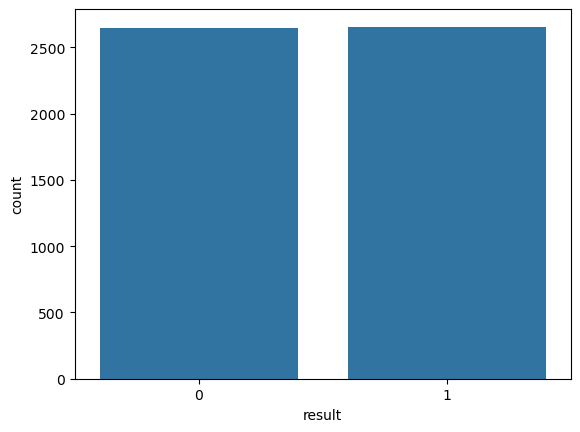

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=delivery_df['result'])  # Use x= instead of passing the column directly
plt.show()  # Ensure the plot is displayed


In [44]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets_left','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]
                        
                        ##we are taking only important columns 

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208.0,119.0,9,208.0,0.0,10.487395,1
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208.0,118.0,8,208.0,0.0,10.576271,1
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204.0,117.0,7,208.0,8.0,10.461538,1
3,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204.0,116.0,6,208.0,6.0,10.551724,1
4,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,202.0,115.0,5,208.0,7.2,10.539130,1


In [45]:
final_df.shape

(5302, 10)

In [46]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       1
balls_left      1
wickets_left    0
total_runs_x    0
cur_run_rate    1
req_run_rate    1
result          0
dtype: int64

In [47]:
# dropping of null values

final_df = final_df.dropna()

final_df.isnull().sum()


batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [48]:
final_df = final_df[final_df['balls_left'] != 0]

In [49]:
data = final_df.copy()

test = data['result']

train = data.drop(['result'],axis = 1)

train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208.0,119.0,9,208.0,0.0,10.487395
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208.0,118.0,8,208.0,0.0,10.576271
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204.0,117.0,7,208.0,8.0,10.461538
3,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204.0,116.0,6,208.0,6.0,10.551724
4,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,202.0,115.0,5,208.0,7.2,10.539130


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=1)

X_train.shape,X_test.shape

((4216, 9), (1055, 9))

In [51]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cf = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [54]:
# creating the pipeline

# lr = LogisticRegression(solver='liblinear')
pipe = Pipeline(steps=[
    ('step1', cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

# fitting the training data

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [55]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8834123222748815


In [56]:
pipe.predict_proba(X_test)[10]

array([0.99874671, 0.00125329])

In [57]:
# rf = RandomForestClassifier()
pipe2 = Pipeline(steps=[
    ('step1', cf),
    ('step2',RandomForestClassifier())
])

pipe2.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

1.0


In [58]:
pipe2.predict_proba(X_test)[10]

array([1., 0.])

In [59]:
# saving the logistic regression model
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))